# Task 1

Complete path: ['A', 'C', 'D', 'E']
Total cost: 16
Time Complexity: 4
Space Complexity: 1


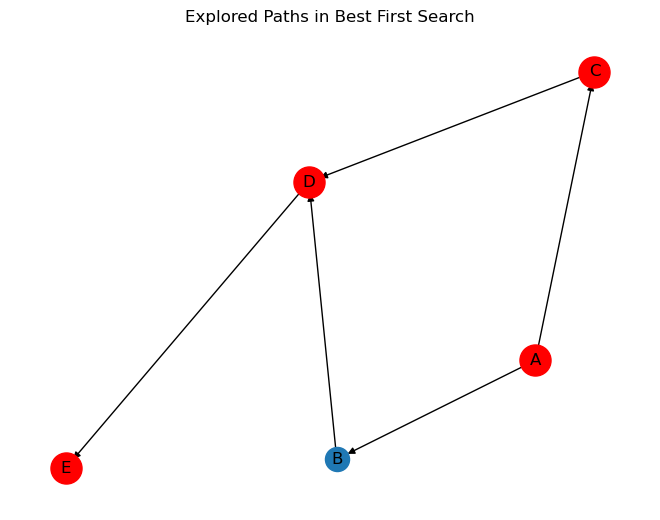

In [17]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.adjacency_list = {}

    def add_edge(self, node, neighbor, weight):
        if node not in self.adjacency_list:
            self.adjacency_list[node] = []
        self.adjacency_list[node].append((neighbor, weight))

    def best_first_search(self, start, goal):
        visited = set()
        priority_queue = [(0, start)]  
        heapq.heapify(priority_queue)
        parent = {} 
        explored_paths = []  
        total_cost = 0 

        while priority_queue:
            _, current_node = heapq.heappop(priority_queue)
            visited.add(current_node)
            explored_paths.append((current_node, len(priority_queue))) 
            if current_node == goal:
                path = [current_node]
                while current_node != start:
                    current_node = parent[current_node]
                    path.append(current_node)
                path.reverse()
                return path, total_cost, explored_paths
            for neighbor, weight in self.adjacency_list.get(current_node, []):
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (weight, neighbor))
                    visited.add(neighbor)
                    parent[neighbor] = current_node
                    total_cost += weight 

        return None, total_cost, explored_paths

graph = Graph()
graph.add_edge('A', 'B', 6)
graph.add_edge('A', 'C', 3)
graph.add_edge('B', 'D', 4)
graph.add_edge('C', 'D', 3)  
graph.add_edge('D', 'E', 4)

start_node = 'A'
goal_node = 'E'

import time
start_time = time.time()
complete_path, total_cost, explored_paths = graph.best_first_search(start_node, goal_node)
end_time = time.time()

if complete_path:
    print("Complete path:", complete_path)
    print("Total cost:", total_cost)
else:
    print("No path found.")

time_complexity = len(explored_paths)
print("Time Complexity:", time_complexity)
max_queue_size = max([queue_size for _, queue_size in explored_paths])
print("Space Complexity:", max_queue_size)

G = nx.DiGraph()
for node, neighbors in graph.adjacency_list.items():
    for neighbor, _ in neighbors:
        G.add_edge(node, neighbor)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True)
nx.draw_networkx_nodes(G, pos, nodelist=[node for node, _ in explored_paths], node_color='r', node_size=500)
plt.title("Explored Paths in Best First Search")
plt.show()


# task 2

Complete path: ['A', 'C', 'F']
Total cost: 5
Time Complexity: 3
Space Complexity: 2


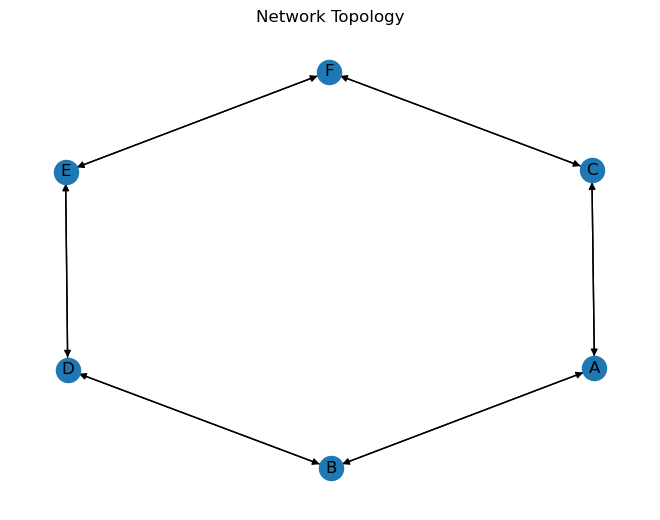

In [22]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.adjacency_list = {}
        self.heuristic_values = {} 

    def add_edge(self, node, neighbor, weight):
        if node not in self.adjacency_list:
            self.adjacency_list[node] = []
        self.adjacency_list[node].append((neighbor, weight))

    def set_heuristic_value(self, node, heuristic):
        self.heuristic_values[node] = heuristic

    def calculate_manhattan_distance(self, node1, node2):
        x1, y1 = node1
        x2, y2 = node2
        return abs(x1 - x2) + abs(y1 - y2)

    def best_first_search_astar(self, start, goal):
        visited = set()
        priority_queue = [(0, start)]
        heapq.heapify(priority_queue)
        parent = {}
        max_queue_size = 0
        nodes_visited = 0

        while priority_queue:
            nodes_visited += 1
            max_queue_size = max(max_queue_size, len(priority_queue))
            _, current_node = heapq.heappop(priority_queue)
            visited.add(current_node)

            if current_node == goal:
                path = [current_node]
                total_cost = 0
                while current_node != start:
                    parent_node, weight = parent[current_node]
                    path.append(parent_node)
                    total_cost += weight
                    current_node = parent_node
                path.reverse()
                return path, total_cost, nodes_visited, max_queue_size

            for neighbor, weight in self.adjacency_list.get(current_node, []):
                if neighbor not in visited:
                    heuristic = self.heuristic_values[neighbor]
                    heapq.heappush(priority_queue, (heuristic + weight, neighbor))
                    visited.add(neighbor)
                    parent[neighbor] = (current_node, weight)

        return None, None, nodes_visited, max_queue_size

graph = Graph()
graph.add_edge('A', 'B', 3)
graph.add_edge('B', 'A', 3)
graph.add_edge('A', 'C', 3)
graph.add_edge('C', 'A', 3)
graph.add_edge('B', 'D', 5)
graph.add_edge('D', 'B', 5)
graph.add_edge('D', 'E', 4)
graph.add_edge('E', 'D', 4)
graph.add_edge('E', 'F', 0)
graph.add_edge('F', 'E', 0)
graph.add_edge('C', 'F', 2)
graph.add_edge('F', 'C', 2)

graph.set_heuristic_value('A', graph.calculate_manhattan_distance((3, 1), (5, 5)))
graph.set_heuristic_value('B', graph.calculate_manhattan_distance((1, 2), (5, 5)))
graph.set_heuristic_value('C', graph.calculate_manhattan_distance((5, 2), (5, 5)))
graph.set_heuristic_value('D', graph.calculate_manhattan_distance((1, 4), (5, 5)))
graph.set_heuristic_value('E', graph.calculate_manhattan_distance((3, 5), (5, 5)))
graph.set_heuristic_value('F', 0)

start_node = 'A'
goal_node = 'F'
complete_path, total_cost, nodes_visited, max_queue_size = graph.best_first_search_astar(start_node, goal_node)

if complete_path:
    print("Complete path:", complete_path)
    print("Total cost:", total_cost)
    print("Time Complexity:", nodes_visited)
    print("Space Complexity:", max_queue_size)
else:
    print("No path found.")

G = nx.DiGraph()
for node, neighbors in graph.adjacency_list.items():
    for neighbor, _ in neighbors:
        G.add_edge(node, neighbor)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True)
plt.title("Network Topology")
plt.show()
